In [50]:
import os
import glob
import librosa
import numpy as np
import soundfile as sf

path = '/Users/kehindeelelu/Library/CloudStorage/OneDrive-ClemsonUniversity/RESEARCH/09_September_2023/Code/SELD'

# Set the path to the folder containing audio files
folder_path = f'{path}/data_prep/audio'  # Replace with the path to your folder

# List all audio files in the folder (assuming they have the .wav extension)
audio_files = glob.glob(os.path.join(folder_path, '*.wav'))

# Initialize an empty array to store the combined audio
combined_audio = np.zeros(0)

curr_audio = audio_files[6]

# Loop through each audio file in the folder
for i in range(0, 11):
    # Load the audio using Librosa
    y, sr = librosa.load(curr_audio, sr=None)

    # Set the desired length (e.g., 6 seconds each)
    desired_length = 6 * sr  # Assuming all audio files should be 6 seconds long

    # Pad or trim the audio to the desired length
    y = librosa.util.fix_length(y, desired_length)

    # Add the current audio to the combined audio
    combined_audio = np.append(combined_audio, y)

# Save the resulting combined audio using soundfile
audio_files_ = curr_audio.split('/')[-1]
output_file = f'{path}/data_prep/control_test/{audio_files_}'  # Specify the desired output file path
sf.write(output_file, combined_audio, sr)  # Use the sample rate from the last loaded file

print("Combined audio saved to", output_file)


Combined audio saved to /Users/kehindeelelu/Library/CloudStorage/OneDrive-ClemsonUniversity/RESEARCH/09_September_2023/Code/SELD/data_prep/control_test/concretepumper.wav


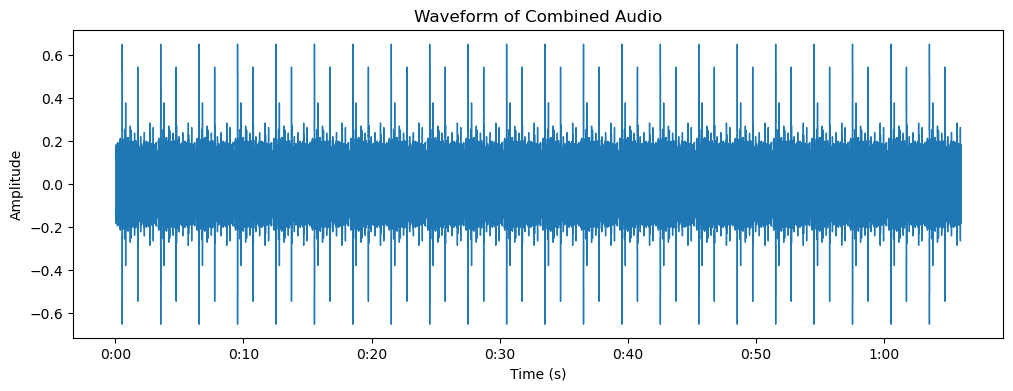

In [52]:
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

# Load the combined audio file
audio_file = f'{path}/data_prep/control_test/{audio_files_}'  # Replace with the path to your combined audio file
y, sr = librosa.load(audio_file, sr=None)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Combined Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [ ]:
import IPython.display as ipd
ipd.Audio(y, rate=sr)